In [16]:
import numpy as np
import sklearn
import shap
import time
import torch
import pandas as pd
from Data import CSVData
import matplotlib.pyplot as plt

In [2]:
if torch.cuda.is_available():
    device='cuda'
else:
    device='cpu'

In [3]:
features = ['mode',
'Msim',
'Gsim',
'weight',
'pz_in1',
'pid_in1', 
'pz_in2',
'pid_in2',
'px_out1',
'py_out1',
'pz_out1',
'e_out1',
'pid_out1',
'px_out2',
'py_out2',
'pz_out2',
'e_out2',
'pid_out2',
'px_out3',
'py_out3',
'pz_out3',
'e_out3',
'pid_out3',
'px_out4',
'py_out4',
'pz_out4',
'e_out4',
'pid_out4',
'Mtarget',
'Gtarget',]
label = 'f_rwt'
features_to_rescale = ['Msim',
'Gsim',
'pz_in1', 
'pz_in2',
'px_out1',
'py_out1',
'pz_out1',
'e_out1',
'px_out2',
'py_out2',
'pz_out2',
'e_out2',
'px_out3',
'py_out3',
'pz_out3',
'e_out3',
'px_out4',
'py_out4',
'pz_out4',
'e_out4',
'Mtarget',
'Gtarget']

In [4]:
model_path = '/raid/projects/asinha15/VLQ-NN-Reweighting/trained_models/model_scripted6.pt'
model = torch.jit.load(model_path).to(device)
model.eval()

RecursiveScriptModule(
  original_name=Sequential
  (Linear0): RecursiveScriptModule(original_name=Linear)
  (Activation0): RecursiveScriptModule(original_name=LeakyReLU)
  (Linear1): RecursiveScriptModule(original_name=Linear)
  (Activation1): RecursiveScriptModule(original_name=LeakyReLU)
  (Linear2): RecursiveScriptModule(original_name=Linear)
  (Activation2): RecursiveScriptModule(original_name=LeakyReLU)
  (Linear_last): RecursiveScriptModule(original_name=Linear)
  (Activation_last): RecursiveScriptModule(original_name=LeakyReLU)
)

In [5]:
def f(X):
    inputs = torch.Tensor(X).to(device)
    with torch.no_grad():
        outputs = model(inputs).to('cpu').numpy().flatten()
    return outputs

In [6]:
test_data = CSVData(batch_size=1024, features_name=features, labels_name=label, features_to_rescale= features_to_rescale, file_names=['/raid/projects/asinha15/test_' + str(i)+'.csv' for i in range(0,10)])

In [7]:
X, Y = test_data.load_data_many()
X = pd.DataFrame(np.array(X))
Y = Y.flatten()
X.columns = features

In [8]:
shap.initjs()

explainer = shap.KernelExplainer(f, X.iloc[:50,:])
shap_values = explainer.shap_values(X.iloc[299,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X.iloc[299,:])

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 


In [9]:
import warnings

warnings.filterwarnings('ignore')

In [10]:
X_subset=X.sample(n=500) #finding the shap values for 500 events
shap_values500 = explainer.shap_values(X_subset, np_samples=500)

  0%|          | 0/500 [00:00<?, ?it/s]

In [11]:
warnings.filterwarnings('default')

In [12]:
shap.force_plot(explainer.expected_value, shap_values500, X_subset)

In [77]:
X_subset.reset_index()

ValueError: cannot insert level_0, already exists

In [80]:
del X_subset['level_0'], X_subset['index']

In [82]:
X_subset.shape

(500, 30)

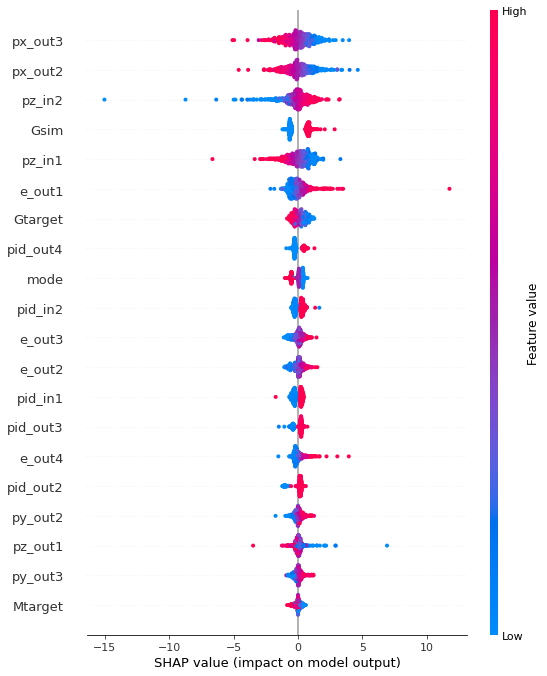

In [83]:
shap.summary_plot(shap_values500, X_subset)

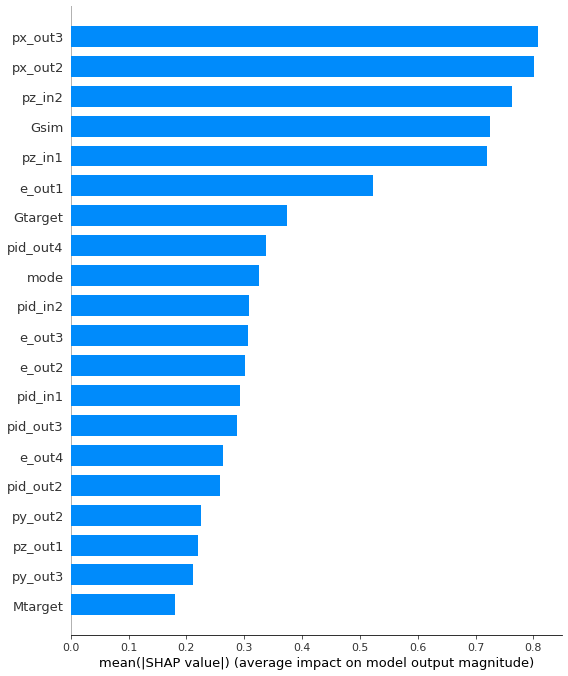

In [84]:
shap.summary_plot(shap_values500, X_subset, plot_type='bar')

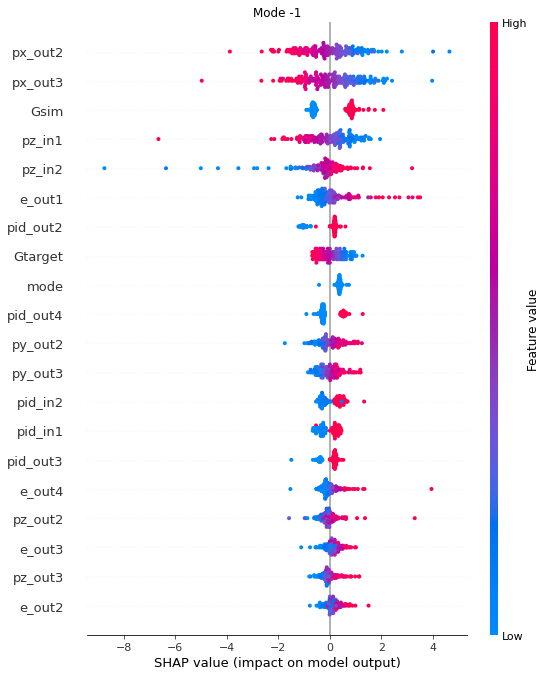

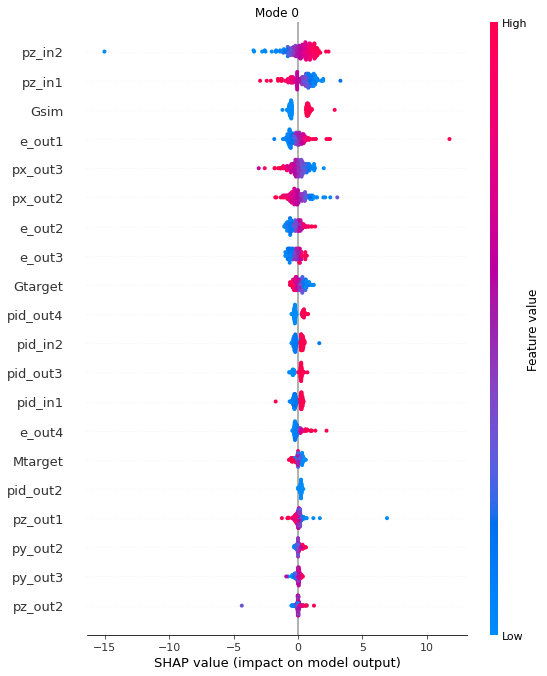

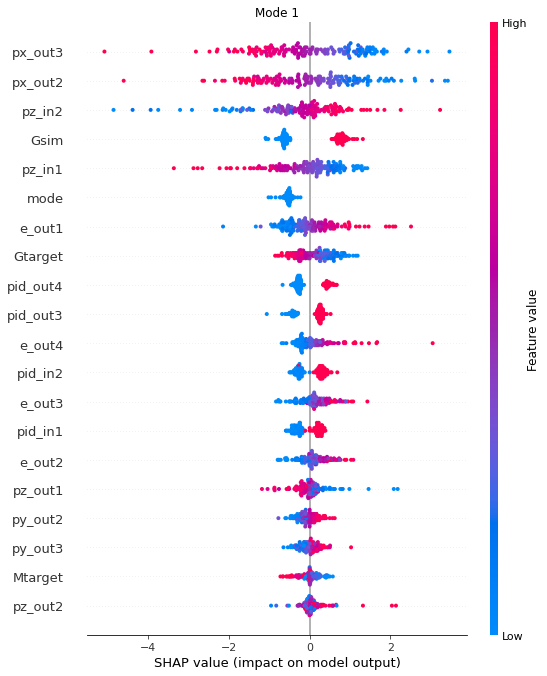

In [90]:
modes = [-1,0,1]
for i, b in enumerate(modes):
    plt.title(f"Mode {b}")
    idx = X_subset.index[X_subset['mode']==b].tolist()
    X_subsubset = pd.DataFrame([X_subset.iloc[idxi,:] for idxi in idx])
    shap.summary_plot(np.array([shap_values500[idxi,:] for idxi in idx]), X_subsubset)
    del X_subsubset

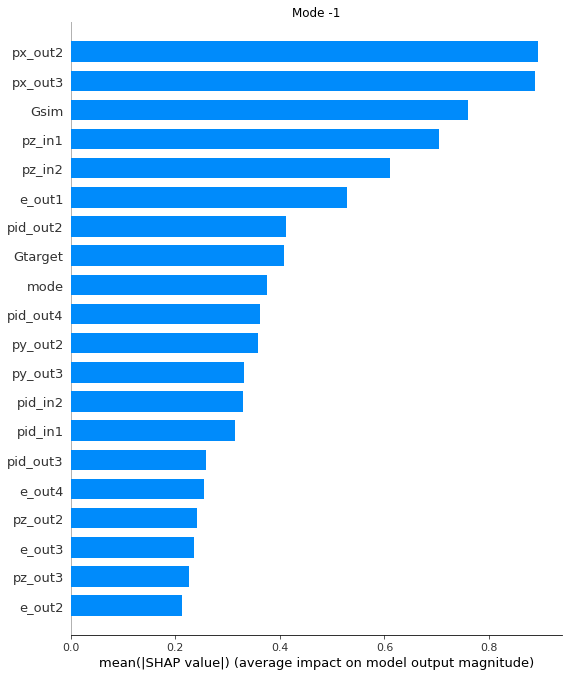

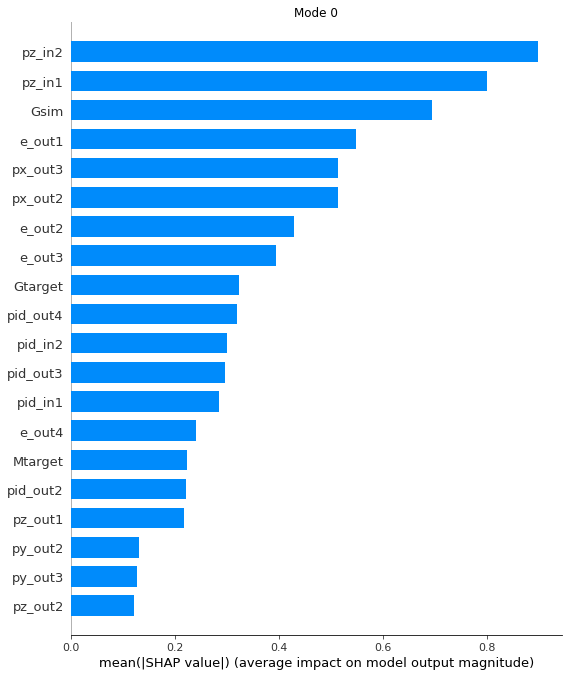

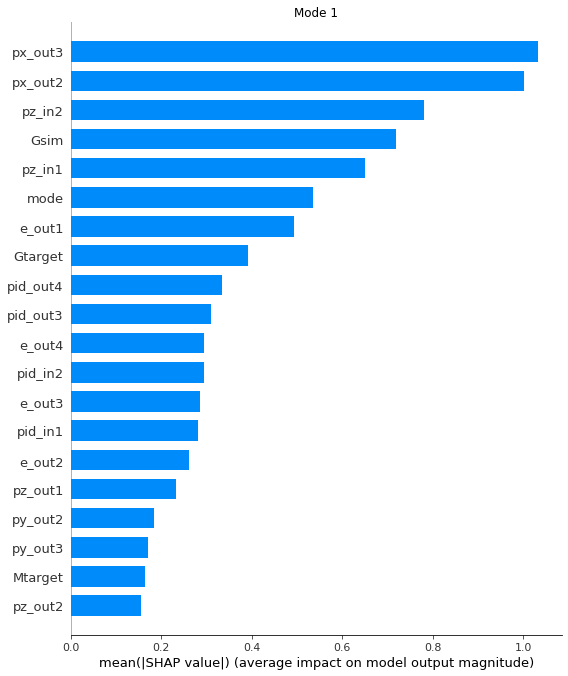

In [91]:
for i, b in enumerate(modes):
    plt.title(f"Mode {b}")
    idx = X_subset.index[X_subset['mode']==b].tolist()
    X_subsubset = pd.DataFrame([X_subset.iloc[idxi,:] for idxi in idx])
    shap.summary_plot(np.array([shap_values500[idxi,:] for idxi in idx]), X_subsubset, plot_type='bar')
    del X_subsubset

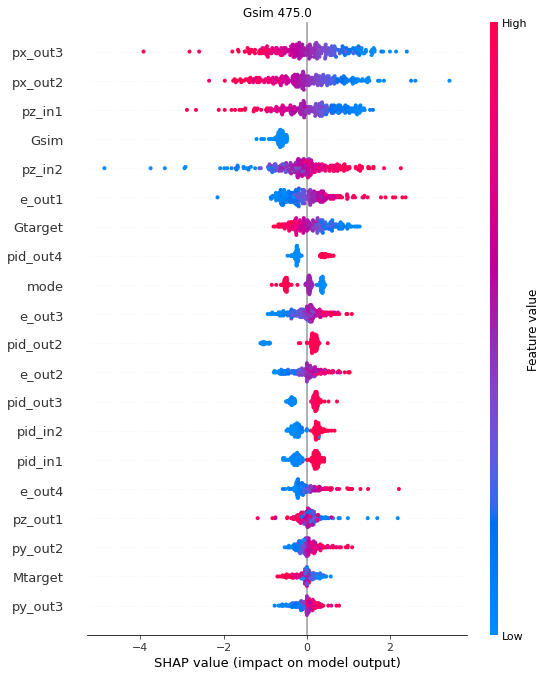

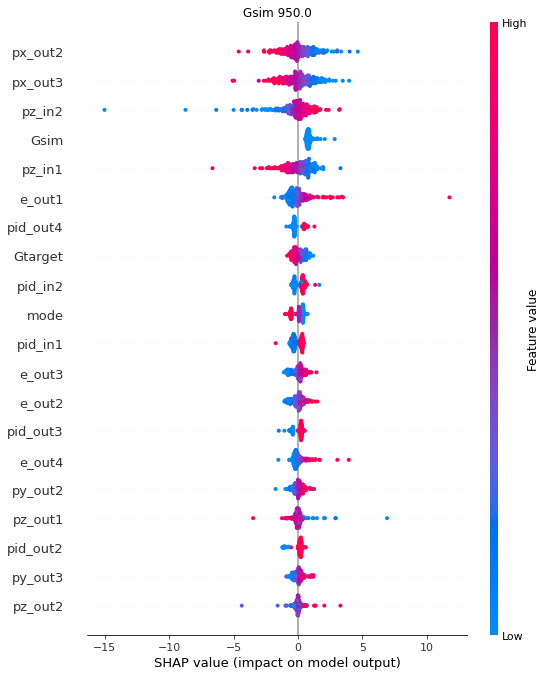

In [87]:
Gsims = X_subset.Gsim.unique()
for i, b in enumerate(Gsims):
    plt.title(f"Gsim {b}")
    idx = X_subset.index[X_subset['Gsim']==b].tolist()
    X_subsubset = pd.DataFrame([X_subset.iloc[idxi,:] for idxi in idx])
    shap.summary_plot(np.array([shap_values500[idxi,:] for idxi in idx]), X_subsubset)
    del X_subsubset

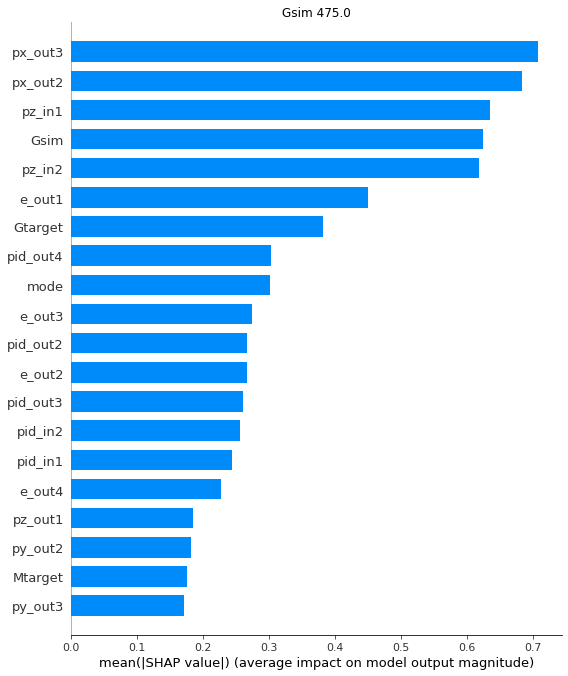

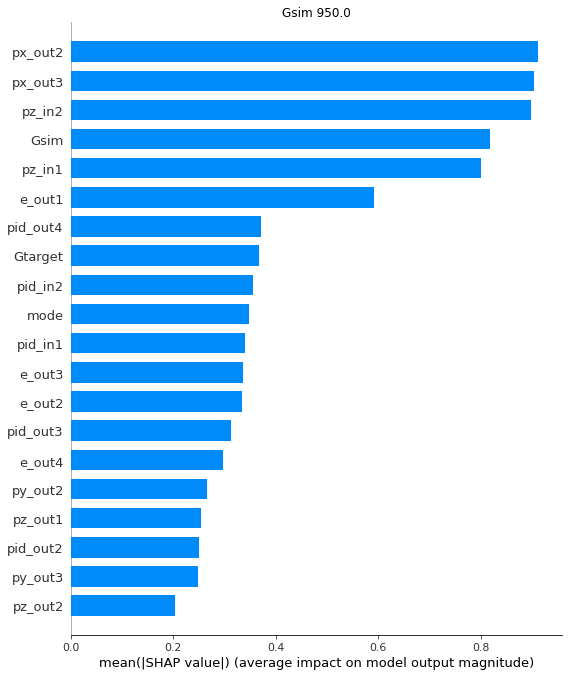

In [92]:
for i, b in enumerate(Gsims):
    plt.title(f"Gsim {b}")
    idx = X_subset.index[X_subset['Gsim']==b].tolist()
    X_subsubset = pd.DataFrame([X_subset.iloc[idxi,:] for idxi in idx])
    shap.summary_plot(np.array([shap_values500[idxi,:] for idxi in idx]), X_subsubset, plot_type='bar')
    del X_subsubset